In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

In [6]:
#Install the dataset we are interested in containing ipl match information from 2008-2023: 

data_ipl = pd.read_csv("/Users/Shreya1/Desktop/projects/Ipl win predictor project/ipl 2008-2023 data/match_info_data.csv")

#looking at the frist 5 rows of the dataset we're interested in: 

data_ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [7]:
#Brief summary: 

data_ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,1.024000e+03,1024.000000,1024.000000,1024.000000
mean,8.687579e+05,0.020508,13.610352,3.286133
std,3.528920e+05,0.141799,23.443273,3.375659
min,3.359820e+05,0.000000,0.000000,0.000000
25%,5.483138e+05,0.000000,0.000000,0.000000
50%,8.298140e+05,0.000000,0.000000,3.000000
75%,1.216503e+06,0.000000,19.000000,6.000000
max,1.370353e+06,1.000000,146.000000,10.000000


In [8]:
#Checking for missing values:
data_ipl.isnull().sum()


id                  0
season              0
city               51
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner             19
win_by_runs         0
win_by_wickets      0
player_of_match     5
venue               0
umpire1             0
umpire2             0
umpire3             3
dtype: int64

In [9]:
#Dropping columns:
data_ipl = data_ipl.iloc[:,:-1]
data_ipl.dropna(inplace=True)

In [11]:
#Total teams listed:
data_ipl["team1"].unique()

#Changing names of teams: 
#for Delhi Capitals
data_ipl['team1']=data_ipl['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data_ipl['team2']=data_ipl['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data_ipl['winner']=data_ipl['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
data_ipl['team1']=data_ipl['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data_ipl['team2']=data_ipl['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data_ipl['winner']=data_ipl['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

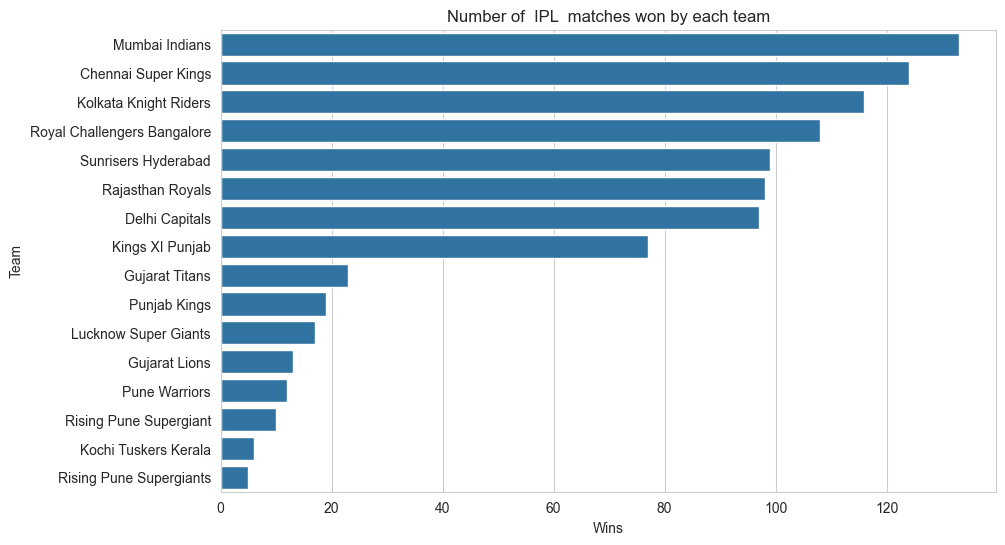

In [12]:
#Now we're looking at the number of IPL matches by each team: 
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data_ipl,order= data_ipl['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Toss Decision')

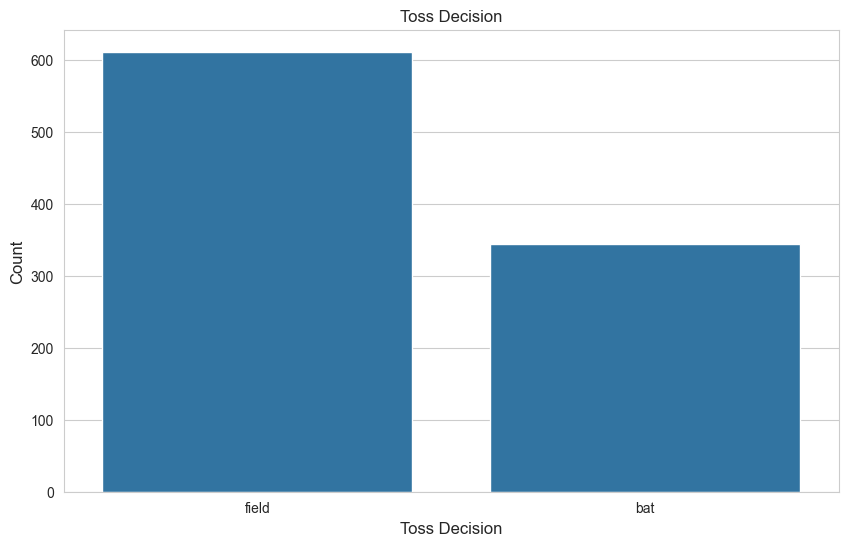

In [13]:
#Now I thought it would be interesting to look at what decison was made by the team winning the toss: 

plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data_ipl)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [14]:
#Unique values in each feature:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(data_ipl[i].unique())
  print(data_ipl[i].value_counts())

------------
['Ahmedabad' 'Chennai' 'Mumbai' 'Bengaluru' 'Kolkata' 'Delhi' 'Dharamsala'
 'Hyderabad' 'Lucknow' 'Jaipur' 'Chandigarh' 'Guwahati' 'Navi Mumbai'
 'Pune' 'Dubai' 'Sharjah' 'Abu Dhabi' 'Visakhapatnam' 'Indore' 'Bangalore'
 'Kanpur' 'Rajkot' 'Raipur' 'Ranchi' 'Cuttack' 'Kochi' 'Nagpur'
 'Johannesburg' 'Centurion' 'Durban' 'Bloemfontein' 'Port Elizabeth'
 'Kimberley' 'East London' 'Cape Town']
city
Mumbai            165
Kolkata            86
Delhi              83
Chennai            74
Hyderabad          70
Bangalore          62
Chandigarh         61
Jaipur             52
Pune               51
Abu Dhabi          35
Ahmedabad          27
Bengaluru          21
Durban             15
Dubai              13
Visakhapatnam      13
Centurion          12
Dharamsala         11
Sharjah            10
Navi Mumbai         9
Indore              9
Rajkot              9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Cuttack             7
Cape Town           6
Raipur           

In [16]:
#Dropping some features from the dataset to ensure they don't affect model accuracy: 
data_ipl.drop(["id", "season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [18]:
#Data manipulation: First converting our data into dependent and independent: 
X = data_ipl.drop(["winner"], axis=1)
y = data_ipl["winner"]

#I realised it is also important to convert the categorical data into numerical values, which I did using the get_dummies method in pandas: 

X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

In [19]:
#The output data is also a categorical value, so I am converting it into numerical using LabelEncoder 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
#Creating training set:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [21]:
#Model evaluation: I chose to do random forest and logistic regression: 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")
#Training the random forest classifier model

model.fit(x_train, y_train)
#Predicting the model with x_test values and saving it as y_pred

y_pred = model.predict(x_test)

#Using the accuracy score of sklearn, we are evaluating the predicted result and accuracy of the model
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.